In [1]:
from quantumsim.functions.ansatz import *
from quantumsim.functions.min_methods import *
from quantumsim.functions.funciones import *
from quantumsim.optimizacion_structure import *
from quantumsim.variational_quantum_eigensolver import *


from physics.Hybrid.thermal import *

from pennylane import numpy as np
import matplotlib.pyplot as plt

# Variational quantum eigensolver

In [2]:
params = {
    "sites": 3,
    "spin": 0.5, 
    "pattern": "open",
    "exchange": [1,1,1]
}

spin_chain = vqe_spin(params)
spin_chain.set_group_characteristics()

In [3]:
ansatz_params = {
    "repetitions": 3,
    "base": "default.qubit",
    "backend": None,
    "interface": "autograd",
    "shots": 1000.0,
    "token": None,
    "pattern": "chain"
}

spin_chain.set_device(ansatz_params)
spin_chain.set_node(ansatz_params)

rep = ansatz_params["repetitions"]
number = (spin_chain.qubits)*rep

In [4]:
minimizate_params = {
    "type": "SLSQP",
    "maxiter": 100,
    "tol": 0.000001,
    "number": spin_chain.qubits*ansatz_params["repetitions"]}

# Ejecucion del optimizador para calcular los niveles 
# de energia

optimizer = scipy_optimizer(minimizate_params)
energy, optimum = optimizer.VQE(spin_chain.cost_function, spin_chain.qubits)

[0, 1, 0]


In [6]:
sz = np.array([[1,0],[0,-1]])
si = np.array([[1,0],[0,1]])
sx = np.array([[0,1],[1,0]])
sy = np.array([[0,-1j],[1j,0]])

h = -1*(np.kron(si, np.kron(sz, sz)) + np.kron(sz, np.kron(sz, si)) + np.kron(si, np.kron(sx, sx)) + np.kron(sx, np.kron(sx, si)) + np.kron(si, np.kron(sy, sy)) + np.kron(sy, np.kron(sy, si)))
ee = np.sort( np.linalg.eigvals(h) )

/Users/jnorambu/Documents/vqesimulation/env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


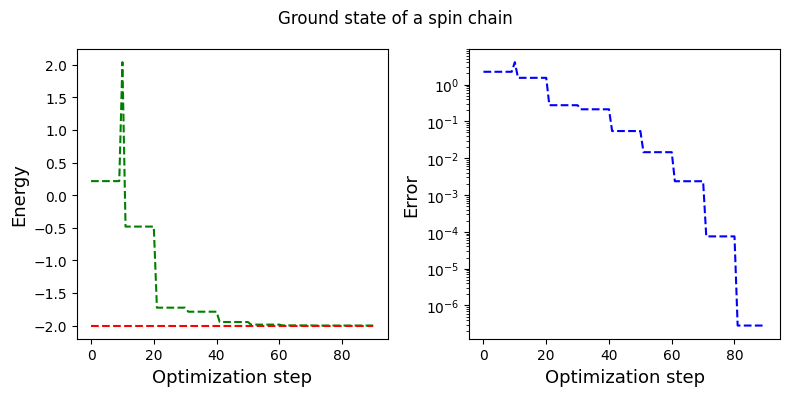

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Optimization step", fontsize=13)
ax[0].set_ylabel("Energy", fontsize=13)

ax[1].set_xlabel("Optimization step", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)

fig.suptitle('Ground state of a spin chain', fontsize=12)

ax[0].plot([i for i in range(len(energy))], energy, "g", ls="dashed")
ax[0].plot([i for i in range(len(energy))], [ee[0] for i in range(len(energy))], "r", ls="dashed")

ax[1].plot([i for i in range(len(energy))], [np.abs(energy[i] -ee[0]) for i in range(len(energy))], "b", ls="dashed")
ax[1].set_yscale("log")
fig.tight_layout()
plt.show()

# Variational quantum deflation

In [2]:
params = {
    "sites": 3,
    "spin": 0.5, 
    "pattern": "open",
    "exchange": [1,1,1]
}

spin_chain = vqe_spin(params)
spin_chain.set_group_characteristics()

In [3]:
ansatz_params = {
    "repetitions": 3,
    "base": "default.qubit",
    "backend": None,
    "interface": "autograd",
    "shots": 1000.0,
    "token": None,
    "pattern": "chain"
}

spin_chain.set_device(ansatz_params)
spin_chain.set_node(ansatz_params)

rep = ansatz_params["repetitions"]
number = (spin_chain.qubits)*rep

In [4]:
minimizate_params = {
    "type": "SLSQP",
    "maxiter": 100,
    "tol": 0.000001,
    "number": spin_chain.qubits*ansatz_params["repetitions"]}

# Ejecucion del optimizador para calcular los niveles 
# de energia

optimizer = scipy_optimizer(minimizate_params)
energy, optimum = optimizer.VQD(spin_chain.cost_function, spin_chain.overlap_cost_function, 8, spin_chain.qubits)

state  1
state  2
state  3
state  4
state  5
state  6
state  7
state  8


In [17]:
sz = np.array([[1,0],[0,-1]])
si = np.array([[1,0],[0,1]])
sx = np.array([[0,1],[1,0]])
sy = np.array([[0,-1j],[1j,0]])

h = -1*(np.kron(si, np.kron(sz, sz)) + np.kron(sz, np.kron(sz, si)) + np.kron(si, np.kron(sx, sx)) + np.kron(sx, np.kron(sx, si)) + np.kron(si, np.kron(sy, sy)) + np.kron(sy, np.kron(sy, si)))
ee = np.linalg.eigvals(h)

### Grafico comparativo

/Users/jnorambu/Documents/vqesimulation/env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


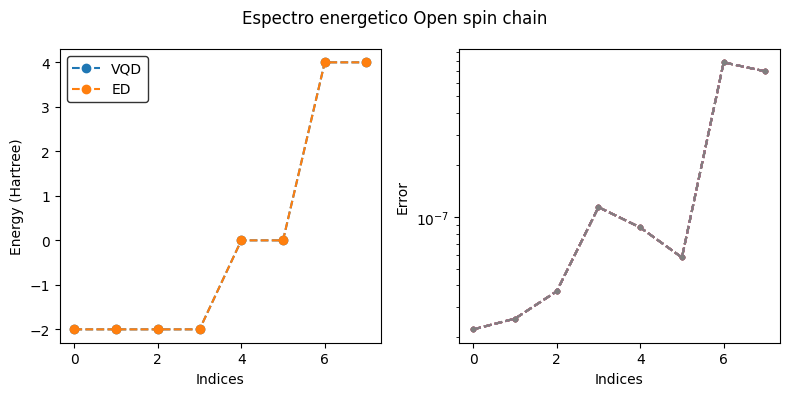

In [6]:
import matplotlib.pyplot as plt

exacto = np.sort(ee)

fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel('Indices', fontsize=10)
ax[0].set_ylabel('Energy (Hartree)', fontsize=10)

ax[0].plot([i for i in range(len(energy))], np.sort(energy), "o--", label="VQD")
ax[0].plot([i for i in range(8)], exacto, "o--", label="ED")
ax[0].legend(loc="upper left", fontsize='medium',frameon=True, edgecolor='k', ncol=1)

ax[1].set_xlabel('Indices', fontsize=10)
ax[1].set_ylabel('Error', fontsize=10)
for i in range(len(energy)):
    ax[1].plot([i for i in range(8)], [np.abs(float(j)- exacto[k]) for k,j in enumerate( np.sort(energy) )], ".", ls="dashed")
ax[1].set_yscale("log")

fig.suptitle('Espectro energetico Open spin chain', fontsize=12)
fig.tight_layout()
plt.show()

In [7]:
params = {
    "sites": 3,
    "spin": 0.5, 
    "pattern": "open",
    "exchange": [1,1,1],
    "energy": energy,
    "states": optimum
}

thermal =  hybrid_thermal(params)

In [8]:
ansatz_params = {
    "repetitions": 3,
    "base": "default.qubit",
    "backend": None,
    "interface": "autograd",
    "shots": 1000.0,
    "token": None,
    "pattern": "chain"
}

thermal.set_device(ansatz_params)
thermal.set_node(ansatz_params)


In [27]:
dtype = "float128"
boltz = 8.617333262e-5 #eV/K

def Specific_heat(t, energy, partition):
    partition = np.exp(np.divide(-energy, t*boltz, dtype=dtype), dtype=dtype)
    aux1 = np.divide(np.sum(partition*energy), np.sum(partition))
    aux2 = np.divide(np.sum(partition*(energy**2)), np.sum(partition))

    return np.divide(aux2- (aux1**2), (t*t*boltz), dtype=dtype)

In [29]:
T = np.linspace(10, 200, 11)
aux = []
for i in T:
    partition = thermal.distribution(100)
    expval = thermal.expected_value("enthalpy") 
    aux.append( Specific_heat(i, expval, partition) )


TypeError: data type 'float128' not understood

In [28]:
aux2 = []
for i in T:
    ee = np.real(ee)
    partition = np.exp(np.divide(-ee, i*boltz, dtype=dtype), dtype=dtype)
    aux2.append( Specific_heat(i, ee, partition) )

NameError: name 'T' is not defined

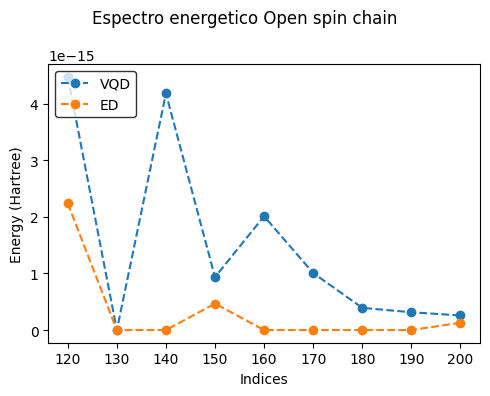

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5,4),)
ax.set_xlabel('Indices', fontsize=10)
ax.set_ylabel('Energy (Hartree)', fontsize=10)

ax.plot(T, aux, "o--", label="VQD")
ax.plot(T, aux2, "o--", label="ED")
ax.legend(loc="upper left", fontsize='medium',frameon=True, edgecolor='k', ncol=1)


fig.suptitle('Espectro energetico Open spin chain', fontsize=12)
fig.tight_layout()
plt.show()